### Plotting Sim2Real Differences for Position Control
First load all the necessary data which includes:
- Joint position targets
- Joint position results from simulation (e.g., MuJoCo)
- Joint position results from hardware

In [1]:
import dill
import numpy as np
import matplotlib.pyplot as plt
from wx250s_kinematics import WX250sParams


# Load all necessary files
with open("data/joint_trajectories.pkl", "rb") as f:
    target = dill.load(f)

with open("data/sim_trajectories.pkl", "rb") as f:
    sim_res = dill.load(f)

with open("data/hw_trajectories.pkl", "rb") as f:
    hw_res = dill.load(f)

#### Data Pre-processing
The trajectories we currently have are for tracing an equilateral triangle with the end effector.
Each side of the triangle is its own trajectory.
Let's concatenate all the sides into one big trajectory. 

In [2]:
# Concatenate each side of the triangle trajectory
target = np.concatenate((target[0], target[1], target[2]))
sim_res = np.concatenate((sim_res[0], sim_res[1], sim_res[2]))
hw_res = np.concatenate((hw_res[0], hw_res[1], hw_res[2]))

moving_time = 4.0
num_trajs = 3
total_moving_time = moving_time * num_trajs

time_tar = np.linspace(0, moving_time * num_trajs, target.shape[0])
time_sim = np.linspace(0, moving_time * num_trajs, sim_res.shape[0])
time_hw = np.linspace(0, moving_time * num_trajs, hw_res.shape[0])

### Plot the Data

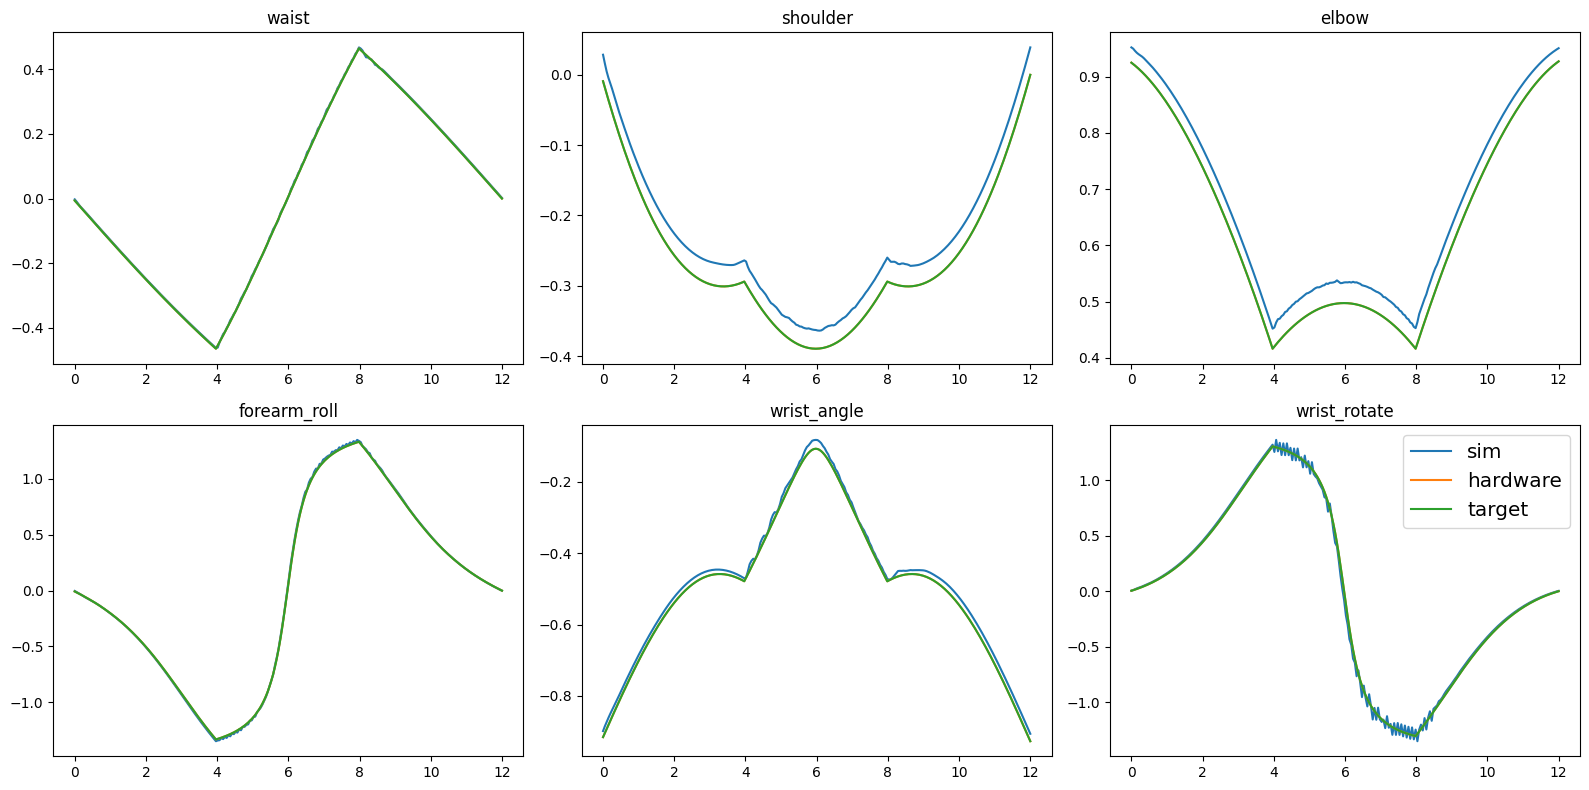

In [4]:
# Plot all angles by their joint type
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
joint_names = WX250sParams().joint_names
indices = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2)]
for j, (x, y) in enumerate(indices):
    ax[x, y].set_title(joint_names[j])
    ax[x, y].plot(time_tar, target[:, j], label="target")
    ax[x, y].plot(time_sim, sim_res[:, j], label="sim")
    ax[x, y].plot(time_hw, hw_res[:, j], label="hardware")
plt.legend(fontsize='x-large')
plt.tight_layout()
plt.show()